In [18]:
import pandas as pd 
traindf = pd.read_csv("train.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
testdf = pd.read_csv("test.csv", encoding="utf-8")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# 1. 缺失值有大小關係填中位數
med = traindf.median()
traindf = traindf.fillna(med)
traindf.isna().sum()

C:\Users\016890\AppData\Local\Temp/ipykernel_27892/803277590.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = traindf.median()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# 測試資料填補 千萬不要重新算，用訓練算出的資料來補
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [23]:
# 缺失值: 類別->最常出現的字
most = traindf['Embarked'].value_counts().idxmax()
traindf['Embarked'] = traindf['Embarked'].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
testdf['Embarked'] = testdf['Embarked'].fillna(most)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [25]:
dummy = pd.get_dummies(traindf['Embarked'])
# axis=0 直的接
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [26]:
# 2. 對類別(?種)特徵 -> One hot encoding (不能承認他們有大小關係)
# 轉 0,1,2承認大小關係
dummy = pd.get_dummies(testdf['Embarked'])
# axis=0 直的接，1 = 衡的接
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [27]:
# 3. 處理比較困難特徵
mid = "Braund, Mr. Owen Harris".split(",")[-1].split(".")[0].replace(" ","")
mid

'Mr'

In [28]:
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0].replace(" ","")
    return mid
name = traindf['Name'].apply(nameflow)
pd.crosstab(name, traindf['Survived']).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [29]:
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0].replace(" ","")
    if mid == 'Miss':
        return 'Miss'
    elif mid == 'Mr':
        return 'Mr'
    elif mid == 'Mrs':
        return 'Mrs'
    else:
        return 'Throw'
name = traindf['Name'].apply(nameflow)
dummy = pd.get_dummies(traindf['Embarked'])
# axis=0 直的街
traindf = pd.concat([traindf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,1,0,0


In [30]:
name = testdf['Name'].apply(nameflow)
dummy = pd.get_dummies(testdf['Embarked'])
# axis=0 直的街
testdf = pd.concat([testdf, dummy], axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,0,1


In [31]:
# Sex雖然可以不用做，但是通常偷懶 所以順勢做
dummy = pd.get_dummies(traindf['Sex'])
# axis=0 直的街
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf['Sex'])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,1,0,0,0,1


In [33]:
# 打印所有欄位
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'C', 'Q',
       'S', 'female', 'male'],
      dtype='object')

In [36]:
# traindf先把PassengerId Drop,test先留著
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],axis=1)
traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,0,0,1,1,0
888,0,3,28.0,1,2,23.4500,0,0,1,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1


<AxesSubplot:>

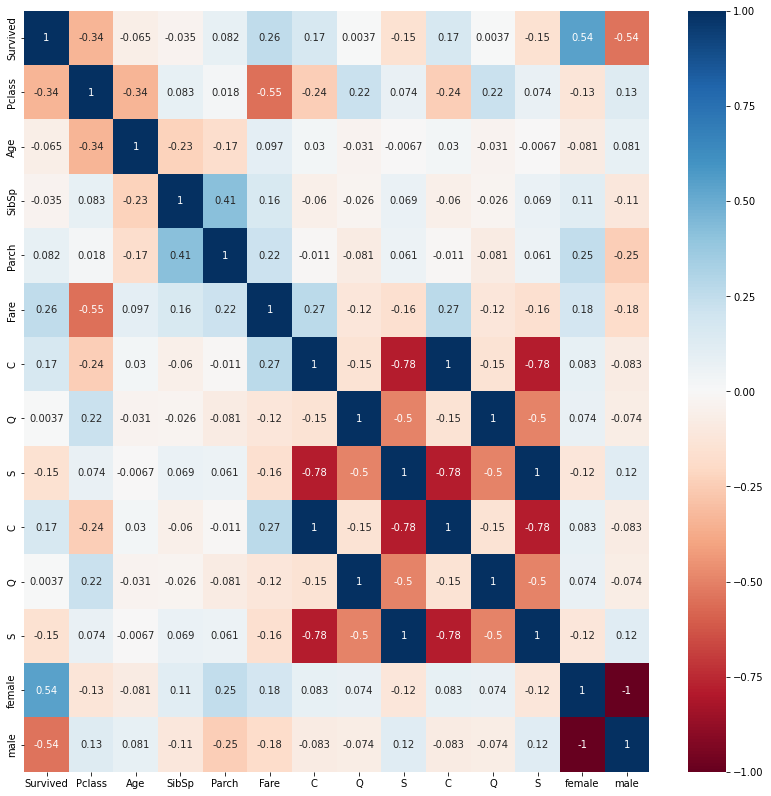

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline #jupyter notebook 專用，自動幫你每一格做.show()
tc = traindf.corr() # 看所有欄位相關係數
plt.figure(figsize=(14,14)) # 調整圖大小
sns.heatmap(tc, annot = True, cmap='RdBu')

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np # 用來處理大量數字
trainx = traindf.drop(["Survived"], axis=1)
trainy = traindf["Survived"]
# n_estimators -> 妳要有幾顆樹
clf = RandomForestClassifier(max_depth=7, n_estimators=26)
np.average(cross_val_score(clf, trainx, trainy, cv=10)) # 交叉驗證切10份

0.833932584269663

In [57]:
# 利用GridSearchCV 找出參數最佳解
from sklearn.model_selection import GridSearchCV
# max_depth:[5, 6, 7, 8, 9, 10]
p = {
    "max_depth": range(5, 11),
    "n_estimators": range(20, 30)
}
clf = RandomForestClassifier()
s = GridSearchCV(clf, p, cv=5)
s.fit(trainx, trainy)
print(s.best_params_)
print(s.best_score_)

{'max_depth': 8, 'n_estimators': 29}
0.830550499027054


In [62]:
testx = testdf.drop(["PassengerId"],axis=1)
testid = testdf["PassengerId"]
clf = RandomForestClassifier(max_depth=8, n_estimators=29)
clf.fit(trainx, trainy)
pre = clf.predict(testx)
result = pd.DataFrame()
result["PassengerId"] = testid
result["Survived"] = pre
result.to_csv("result.csv",encoding="utf-8",index=False) #index = false ->不要儲存列編號

In [63]:
clf.feature_importances_

array([0.13694915, 0.15576227, 0.04934292, 0.0445035 , 0.15853468,
       0.00684846, 0.0052537 , 0.01009916, 0.01074619, 0.00523514,
       0.00896831, 0.19899703, 0.20875949])

In [64]:
trainx.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'C', 'Q', 'S',
       'female', 'male'],
      dtype='object')